## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Read the census data

In [2]:
census_data = pd.read_csv('census_05.csv')
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Orry Row,Gerald,Evans,66.0,Head,Single,Male,"Editor, magazine features",None,Catholic
1,2,Orry Row,Frances,O'Connor,39.0,Head,Single,Female,Games developer,None,Christian
2,2,Orry Row,Harry,O'Connor,7.0,Son,NaN,Male,Student,None,NaN
3,2,Orry Row,Pamela,O'Connor,4.0,Daughter,NaN,Female,Child,None,NaN
4,3,Orry Row,Derek,Ali,54.0,Head,Married,Male,Dancer,None,Christian


## Check the overview/summary of the census data 

In [3]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   10479 non-null  object 
 1   Street                         10480 non-null  object 
 2   First Name                     10480 non-null  object 
 3   Surname                        10480 non-null  object 
 4   Age                            10480 non-null  float64
 5   Relationship to Head of House  10480 non-null  object 
 6   Marital Status                 8054 non-null   object 
 7   Gender                         10480 non-null  object 
 8   Occupation                     10480 non-null  object 
 9   Infirmity                      10480 non-null  object 
 10  Religion                       7986 non-null   object 
dtypes: float64(1), object(10)
memory usage: 900.8+ KB


## Check standand missing values: These are missing values pandas can detect

In [4]:
## Standand missing values: These are missing values pandas can detect
census_data.isnull().sum()

House Number                        1
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2426
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2494
dtype: int64

## Visualisation of missing values as matrix

<AxesSubplot:>

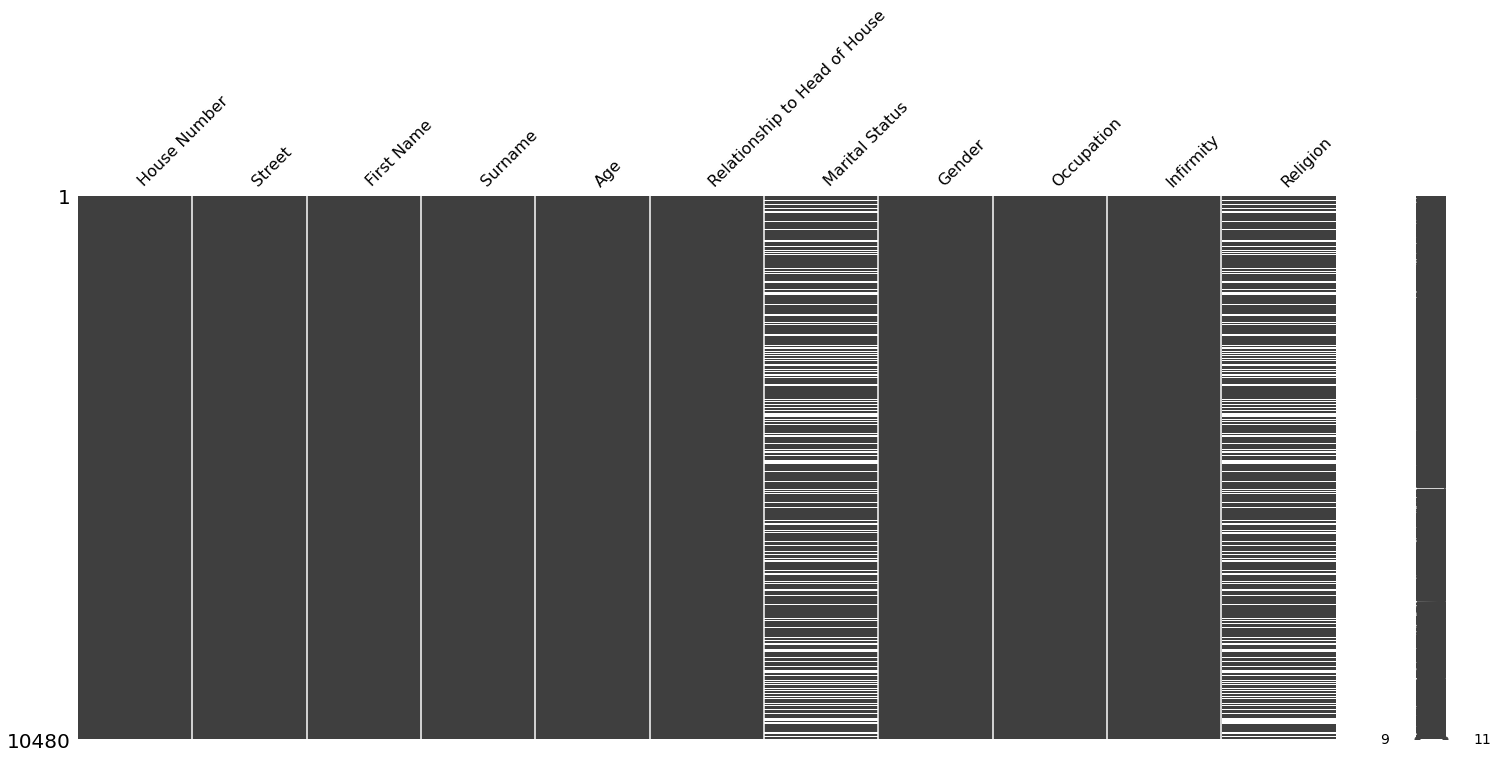

In [5]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(census_data)

### The visualisation above obviously shows that marital status and religion columns majorly constitute the missing values

## Extract unique features of each column

In [6]:
find_columns = census_data.columns

for word in find_columns:
    
    print("\033[1m column %s unique values are : \n"% word, census_data[word].unique(),
          "\n","--------------------------------------------------------------")

 column House Number unique values are : 
 ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' ' ' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '17

# Data Cleaning

## House Number

### Check for standand and non-standand missing values
### Replace the missing values appropriately

In [7]:
## House Number with standand missing values
census_data[census_data['House Number'].isna()]
## Only one missing House Number

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6842,NaN,Leisureskip Road,Christopher,Davison,36.0,Husband,Married,Male,Environmental consultant,None,None


In [8]:
census_data[6838:6845]
## The missing House Number of a man whose wife and son live at House Number 24

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6838,22,Leisureskip Road,Shannon,Collins,7.0,Daughter,NaN,Female,Student,None,NaN
6839,23,Leisureskip Road,Aaron,Howard,69.0,Head,Married,Male,Retired Ambulance person,None,Methodist
6840,23,Leisureskip Road,Zoe,Howard,68.0,Wife,Married,Female,Retired Dancer,None,Methodist
6841,24,Leisureskip Road,Amelia,Davison,38.0,Head,Married,Female,Politician's assistant,None,None
6842,NaN,Leisureskip Road,Christopher,Davison,36.0,Husband,Married,Male,Environmental consultant,None,None
6843,24,Leisureskip Road,Callum,Davison,15.0,Son,NaN,Male,Student,None,NaN
6844,25,Leisureskip Road,Joanne,Chapman-Barnett,34.0,Head,Married,Female,Unemployed,None,Catholic


In [9]:
## House Number with non-standand missing values
census_data.loc[(census_data['House Number'] == ' ')]
## Four House Number with just empty string

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
342,,Miller Turnpike,Paige,Perry,39.0,Head,Married,Female,"Nurse, learning disability",None,None
343,,Miller Turnpike,Bradley,Perry,39.0,Husband,Married,Male,Building services engineer,None,None
344,,Miller Turnpike,Ryan,Perry,20.0,Son,Single,Male,University Student,None,None
345,,Miller Turnpike,Gemma,Perry,0.0,Daughter,NaN,Female,Child,None,NaN


In [10]:
census_data[335:350]
## These are House Number of Head, Husband, Son and Daughter
## The House Number before theirs is 12 and the one after them is 14

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
335,10,Miller Turnpike,Paul,Davies,38.0,Son,Single,Male,Location manager,None,None
336,11,Miller Turnpike,Charlotte,Fisher,46.0,Head,Single,Female,Unemployed,None,Catholic
337,11,Miller Turnpike,Margaret,Fisher,8.0,Daughter,NaN,Female,Student,None,NaN
338,11,Miller Turnpike,Albert,Fisher,4.0,Son,NaN,Male,Child,None,NaN
339,12,Miller Turnpike,Laura,Randall,67.0,Head,Divorced,Female,Unemployed,None,Christian
340,12,Miller Turnpike,Alexander,Randall,39.0,Son,Divorced,Male,Local government officer,None,None
341,12,Miller Turnpike,Fiona,Randall,35.0,Daughter,Divorced,Female,Unemployed,None,None
342,,Miller Turnpike,Paige,Perry,39.0,Head,Married,Female,"Nurse, learning disability",None,None
343,,Miller Turnpike,Bradley,Perry,39.0,Husband,Married,Male,Building services engineer,None,None
344,,Miller Turnpike,Ryan,Perry,20.0,Son,Single,Male,University Student,None,None


In [11]:
## Replace House Number with NaN with 24 
census_data['House Number'] = census_data['House Number'].replace(np.NaN, '24')

## Replace the ones with empty strings (' ') with 13.
census_data['House Number'] = census_data['House Number'].replace(' ', '13')

## Street

### Check for non-standand missing values
### Replace the missing values appropriately

In [12]:
## Non-standand missing values
census_data[census_data['Street']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
937,5,,Jonathan,Davies-Kelly,0.0,Son,NaN,Male,Child,None,NaN


In [13]:
## The Street of a son to a Head living with Partner, Daughter and a lodger at 5 Bath Branch
census_data[935:940]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
935,5,Bath Branch,Susan,Kelly,41.0,Head,Single,Female,Psychiatrist,None,None
936,5,Bath Branch,Gary,Thompson,43.0,Partner,Single,Male,Radiation protection practitioner,None,None
937,5,,Jonathan,Davies-Kelly,0.0,Son,NaN,Male,Child,None,NaN
938,5,Bath Branch,Tracey,Davies-Kelly,0.0,Daughter,NaN,Female,Child,None,NaN
939,5,Bath Branch,Lynda,Palmer,23.0,Lodger,Single,Female,"Secretary, company",None,Muslim


In [14]:
## Replace the empty string with 'Bath Branch'
census_data['Street'] = census_data['Street'].replace(' ', 'Bath Branch')

## First Name

### Check for non-standand missing values
### Replace the missing values appropriately

In [15]:
## Non-standand missing values
census_data[census_data['First Name']== ' ']
## Four people; three females and male, with no First Name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1191,24,Hedgehog Lane,,Ryan,11.0,Daughter,NaN,Female,Student,None,NaN
1364,17,Clementine Field,,Davidson,62.0,Husband,Married,Male,Ceramics designer,None,None
3325,91,Thomas Greens,,Scott,43.0,None,Single,Female,"Conservator, furniture",None,Christian
9033,127,Causeway Avenue,,May,22.0,Head,Divorced,Female,Unemployed,None,None


In [16]:
## Replace with the following random names Katrin, Gabby, Vikki and Kira respectively
census_data.iloc[1191, 2] = 'Katrin'
census_data.iloc[1364, 2] = 'Gabby'
census_data.iloc[3325, 2] = 'Vikki'
census_data.iloc[9033, 2] = 'Kira'

## Surname

### Check for non-standand missing values
### Replace the missing values appropriately

In [17]:
## Non-standand missing values
census_data[census_data['Surname']== ' ']
## Two people with empty strings as their Surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4667,102,Horton Drive,Kirsty,,19.0,Daughter,Divorced,Female,University Student,None,Methodist
6057,173,Kelly Pass,Rachael,,55.0,Head,Single,Female,Unemployed,None,None


In [18]:
census_data[4662:4669]
## This one is daughter living the rest of family at 102 Horton Drive
## Replace with family surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4662,102,Horton Drive,Bethany,Williams,55.0,Head,Married,Female,"Engineer, manufacturing",None,Methodist
4663,102,Horton Drive,Karl,Williams,60.0,Husband,Married,Male,Unemployed,None,Methodist
4664,102,Horton Drive,Adam,Williams,29.0,Son,Divorced,Male,Interpreter,None,Methodist
4665,102,Horton Drive,Phillip,Williams,25.0,Son,Divorced,Male,Community development worker,None,None
4666,102,Horton Drive,Derek,Williams,23.0,Son,Single,Male,Unemployed,None,Methodist
4667,102,Horton Drive,Kirsty,,19.0,Daughter,Divorced,Female,University Student,None,Methodist
4668,103,Horton Drive,Aimee,Parsons,22.0,Head,Single,Female,University Student,None,None


In [19]:
census_data[6056:6060]
## This one is woman living with her daughter at 173 Kelly Pass
## Replace with daughter's surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6056,172,Kelly Pass,Mary,Carr,12.0,Neice,NaN,Female,Student,None,NaN
6057,173,Kelly Pass,Rachael,,55.0,Head,Single,Female,Unemployed,None,None
6058,173,Kelly Pass,Ruth,Field,27.0,Daughter,Single,Female,Unemployed,None,None
6059,174,Kelly Pass,Melissa,Webster,34.0,Head,Married,Female,"Scientist, marine",None,Christian


In [20]:
# Replace the surnames appropriately
census_data.iloc[4667, 3] = 'Williams'
census_data.iloc[6057, 3] = 'Field'

## Age

### Look for individauls are Head at Age less than 18 years
### Change their ages to 18

In [21]:
census_data.loc[(census_data['Age']<18)&(census_data['Relationship to Head of House']=='Head')]
## Two people are Head at Age 15 and 16 respectively

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
633,12,Northumberland Avenue,Hollie,Johnson,15.0,Head,Married,Female,Student,None,NaN
6083,192,Kelly Pass,Amy,Smith,16.0,Head,Divorced,Female,Student,None,NaN


In [22]:
census_data[633:636]
## 15 year old married with a less than a year old son to 19yr old university student

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
633,12,Northumberland Avenue,Hollie,Johnson,15.0,Head,Married,Female,Student,None,NaN
634,12,Northumberland Avenue,Leslie,Johnson,19.0,Husband,Married,Male,University Student,None,None
635,12,Northumberland Avenue,Douglas,Johnson,0.0,Son,NaN,Male,Child,None,NaN


In [23]:
census_data[6083:6086]
## 16 year old divorced with a less than a year old son

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6083,192,Kelly Pass,Amy,Smith,16.0,Head,Divorced,Female,Student,None,NaN
6084,192,Kelly Pass,Guy,Smith,0.0,Son,NaN,Male,Child,None,NaN
6085,193,Kelly Pass,Frank,Chambers,19.0,Head,Single,Male,University Student,Unknown Infection,Catholic


In [24]:
## Under the Law, someone can not be head of the House at Age less than 18. 
## It could be a mistake or outright lie
### Change their Age to 18

census_data.iloc[633, 4] = 18
census_data.iloc[6083, 4] = 18

In [25]:
## Convert Age to the appropraite data type (integer) because age in years cannot be in float dtype
census_data['Age'] = census_data['Age'].astype(int)

In [26]:
census_data['Age'].describe()

count    10480.000000
mean        36.139599
std         21.572362
min          0.000000
25%         19.000000
50%         35.000000
75%         51.000000
max        106.000000
Name: Age, dtype: float64

## Relationship to Head of House

### Look for non-standard missing values
### Replace the missing values appropriately

In [27]:
census_data[census_data['Relationship to Head of House']== ' ']
## Two individuals have no Relationship to Head of House

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
291,52,Ford Throughway,Barry,McDonald,79,,Married,Male,Retired Ecologist,None,Christian
9323,9,Coventry Causeway,Alan,Howe,46,,Divorced,Male,Rural practice surveyor,None,Catholic


In [28]:
census_data[289:293]
## He is married to the head, living in the same with their son
## Replace as Husband

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
289,51,Ford Throughway,Antony,Carroll,18,None,Single,Male,University Student,None,Methodist
290,52,Ford Throughway,Alice,McDonald,77,Head,Married,Female,Retired Industrial buyer,None,Christian
291,52,Ford Throughway,Barry,McDonald,79,,Married,Male,Retired Ecologist,None,Christian
292,52,Ford Throughway,Elliot,McDonald,45,Son,Divorced,Male,"Programmer, applications",None,Christian


In [29]:
census_data[9320:9325]
## He is living in the same house with the head but he is a divorcee
## Replace as None

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9320,7,Coventry Causeway,Teresa,Roberts,63,Wife,Married,Female,Public affairs consultant,None,Christian
9321,8,Coventry Causeway,Shaun,Khan,40,Head,Single,Male,Unemployed,None,Christian
9322,9,Coventry Causeway,Caroline,Birch,25,Head,Divorced,Female,Dramatherapist,None,None
9323,9,Coventry Causeway,Alan,Howe,46,,Divorced,Male,Rural practice surveyor,None,Catholic
9324,9,Coventry Causeway,Marie,Wood,32,Lodger,Single,Female,Field seismologist,None,Christian


In [30]:
## Replace as appropriate
census_data.iloc[291, 5] = 'Husband'
census_data.iloc[9323, 5] = 'None'

## Marital Status

### Look for standard missing values
### Replace the missing values appropriately

In [31]:
## Marital Status with standand missing values
census_data[census_data['Marital Status'].isna()]
## 2426 standard missing values 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Orry Row,Harry,O'Connor,7,Son,NaN,Male,Student,None,NaN
3,2,Orry Row,Pamela,O'Connor,4,Daughter,NaN,Female,Child,None,NaN
6,3,Orry Row,Gregory,Walker,5,Step-Son,NaN,Male,Student,None,NaN
9,4,Orry Row,Clare,Brady,5,Granddaughter,NaN,Female,Student,None,NaN
14,7,Orry Row,Charlotte,Turnbull,9,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10474,1,Evans Villa,Philip,Davies,2,Son,NaN,Male,Child,None,NaN
10476,1,Lewis Abbey,Joshua,Kemp,9,Son,NaN,Male,Student,None,NaN
10477,1,Lewis Abbey,Graeme,Kemp,8,Son,NaN,Male,Student,None,NaN
10478,1,Lewis Abbey,Donald,Kemp,4,Son,NaN,Male,Child,None,NaN


In [32]:
census_data.loc[(census_data['Marital Status'].isna()) & (census_data['Age'] < 18)]
## All the entries with missing values are under 18 individuals

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Orry Row,Harry,O'Connor,7,Son,NaN,Male,Student,None,NaN
3,2,Orry Row,Pamela,O'Connor,4,Daughter,NaN,Female,Child,None,NaN
6,3,Orry Row,Gregory,Walker,5,Step-Son,NaN,Male,Student,None,NaN
9,4,Orry Row,Clare,Brady,5,Granddaughter,NaN,Female,Student,None,NaN
14,7,Orry Row,Charlotte,Turnbull,9,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10474,1,Evans Villa,Philip,Davies,2,Son,NaN,Male,Child,None,NaN
10476,1,Lewis Abbey,Joshua,Kemp,9,Son,NaN,Male,Student,None,NaN
10477,1,Lewis Abbey,Graeme,Kemp,8,Son,NaN,Male,Student,None,NaN
10478,1,Lewis Abbey,Donald,Kemp,4,Son,NaN,Male,Child,None,NaN


In [33]:
census_data.loc[(census_data['Marital Status'] == 'Divorced') & (census_data['Age'] <= 18)]
#census_data.loc[(census_data['Marital Status'] == 'Married') & (census_data['Age'] <= 18)]
#census_data.loc[(census_data['Marital Status'] == 'Widowed') & (census_data['Age'] <= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
274,47,Ford Throughway,Samantha,Owen,18,Daughter,Divorced,Female,Student,None,Christian
377,11,Fountain Street,Alex,Wright,18,Head,Divorced,Male,Student,None,NaN
957,11,Bath Branch,Sam,Baldwin,18,Son,Divorced,Male,Student,None,None
1188,22,Hedgehog Lane,Declan,Wood,18,Head,Divorced,Male,Student,None,NaN
1518,2,Watts Lane,Frank,Thompson,18,Head,Divorced,Male,Student,None,NaN
2767,19,Windy Parkways,Tracy,Jones,18,Daughter,Divorced,Female,Student,None,None
2886,39,Windy Parkways,Jeffrey,Bates,18,Grandson,Divorced,Male,Student,None,Christian
3363,102,Thomas Greens,Brandon,Allen,18,Head,Divorced,Male,Student,None,NaN
4056,34,Hill Drive,Sarah,Palmer,18,Daughter,Divorced,Female,Student,None,Christian
4208,73,Hill Drive,Roger,Jones,18,Son,Divorced,Male,Student,None,None


In [34]:
### 8 individuals are married at age of 18
### 2 persons are widowed at age of 18
### However, about 30 people are divorced at age of 18

In [35]:
## All the missing values for Marital Status are individual less than 18 years
## Replace the missing Marital Status with 'Single'

census_data['Marital Status'] = census_data['Marital Status'].replace(np.NaN, 'Single')

## Gender

### Look for non-standard missing values
### Replace the missing values appropriately

In [36]:
census_data[census_data['Gender']== ' ']
## Two individuals have no Relationship to Head of House

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
951,10,Bath Branch,Hollie,Ferguson,51,Head,Single,,Curator,None,Christian
2242,88,Bailey Islands,Mandy,Wade,32,Daughter,Divorced,,"Therapist, occupational",None,Methodist
5018,199,Horton Drive,Amanda,O'Brien,15,Daughter,Single,,Student,None,NaN
6303,49,Bassenthwaite Forks,Rosemary,Banks,31,Wife,Married,,Water engineer,None,None


In [37]:
census_data[950:957]
## She is the Head living with her partner, two daughters and a son
## Replace with 'Female'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
950,9,Bath Branch,Kayleigh,Wilkinson,61,None,Single,Female,Human resources officer,None,None
951,10,Bath Branch,Hollie,Ferguson,51,Head,Single,,Curator,None,Christian
952,10,Bath Branch,Simon,O'Connor,53,Partner,Single,Male,Games developer,None,None
953,10,Bath Branch,Gavin,Ferguson,23,Son,Single,Male,Advice worker,None,Christian
954,10,Bath Branch,Marie,Ferguson,16,Daughter,Single,Female,Student,None,NaN
955,10,Bath Branch,Amanda,Ferguson,13,Daughter,Single,Female,Student,None,NaN
956,11,Bath Branch,Lynda,Baldwin,42,Head,Single,Female,Unemployed,None,None


In [38]:
census_data[2241:2245]
## She is a daughter to the head 
## Replace with 'Female'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2241,88,Bailey Islands,Heather,Wade,58,Head,Divorced,Female,Unemployed,None,Methodist
2242,88,Bailey Islands,Mandy,Wade,32,Daughter,Divorced,,"Therapist, occupational",None,Methodist
2243,88,Bailey Islands,Francis,Wade,26,Son,Divorced,Male,Barrister,None,Methodist
2244,89,Bailey Islands,Amy,Cook,39,Head,Married,Female,Unemployed,None,Catholic


In [39]:
census_data[5016:5020]
## She is a daughter to the head 
## Replace with 'Female'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5016,199,Horton Drive,Lucy,O'Brien,51,Head,Married,Female,Systems developer,None,Christian
5017,199,Horton Drive,Maurice,O'Brien,52,Husband,Married,Male,Advice worker,None,Christian
5018,199,Horton Drive,Amanda,O'Brien,15,Daughter,Single,,Student,None,NaN
5019,199,Horton Drive,Jade,O'Brien,13,Daughter,Single,Female,Student,None,NaN


In [40]:
census_data[6302:6305]
## She is a wife to the head 
## Replace with 'Female'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6302,49,Bassenthwaite Forks,Connor,Banks,32,Head,Married,Male,"Surveyor, hydrographic",None,Christian
6303,49,Bassenthwaite Forks,Rosemary,Banks,31,Wife,Married,,Water engineer,None,None
6304,50,Bassenthwaite Forks,Kelly,Nash,73,Head,Widowed,Female,Unemployed,None,None


In [41]:
## Replace the empty strings with "Female"
census_data['Gender'] = census_data['Gender'].replace(' ', 'Female')

## Then cast 'M' with Male and 'F' with Female
census_data['Gender'] = census_data['Gender'].replace('M', 'Male')
census_data['Gender'] = census_data['Gender'].replace('F', 'Female')

## Occupation

### Look for non-standard missing values
### Replace the missing values appropriately

In [42]:
census_data[census_data['Occupation']== ' ']
## Two minor with empty string as occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
678,27,Northumberland Avenue,Bradley,Bentley,9,Son,Single,Male,,None,NaN
3712,213,Thomas Greens,Shane,Saunders,15,Son,Single,Male,,None,NaN


In [43]:
census_data[676:681]
## A minor: 9 year old living with parents
## Replace with Student

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
676,27,Northumberland Avenue,Kim,Bentley,48,Head,Married,Female,Minerals surveyor,None,Catholic
677,27,Northumberland Avenue,Carl,Bentley,50,Husband,Married,Male,Phytotherapist,None,Catholic
678,27,Northumberland Avenue,Bradley,Bentley,9,Son,Single,Male,,None,NaN
679,27,Northumberland Avenue,Tina,Bentley,5,Daughter,Single,Female,Student,None,NaN
680,27,Northumberland Avenue,Guy,Bentley,3,Son,Single,Male,Child,None,NaN


In [44]:
census_data[3711:3714]
## A minor: 15 year old living with family
## Replace with Student

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3711,213,Thomas Greens,Lynne,Saunders,47,Head,Single,Female,Chief of Staff,None,Christian
3712,213,Thomas Greens,Shane,Saunders,15,Son,Single,Male,,None,NaN
3713,213,Thomas Greens,Gordon,Saunders,11,Son,Single,Male,Student,None,NaN


In [45]:
## Replace the empty strings with "Student"
census_data['Occupation'] = census_data['Occupation'].replace(' ', 'Student')

In [46]:
## Individuals claiming to be unemployed in retirement
census_data[(census_data['Age'] >= 65) & (census_data['Occupation']=='Unemployed')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
146,15,Ford Throughway,Gail,Richardson,75,Head,Divorced,Female,Unemployed,None,Methodist
154,17,Ford Throughway,Molly,Parry,78,Head,Widowed,Female,Unemployed,None,Christian
333,10,Miller Turnpike,Bethany,Davies,68,Head,Widowed,Female,Unemployed,None,None
339,12,Miller Turnpike,Laura,Randall,67,Head,Divorced,Female,Unemployed,None,Christian
419,6,Outer Neck,Margaret,Whittaker,69,Head,Married,Female,Unemployed,None,Methodist
539,23,Richards Mills,Elliot,Abbott,66,Husband,Married,Male,Unemployed,None,None
626,9,Northumberland Avenue,Amy,Jones,65,Head,Married,Female,Unemployed,None,Christian
801,18,Birmingham Road,Jacqueline,Perry,68,Head,Widowed,Female,Unemployed,None,Christian
1478,31,Summers Drive,Sean,Baker,68,Husband,Married,Male,Unemployed,None,Catholic
1629,41,Watts Lane,Lorraine,Ford,74,Head,Widowed,Female,Unemployed,None,None


In [47]:
### Replace with Retired_Unemployed
census_data[(census_data['Age'] >= 65) 
            & (census_data['Occupation']=='Unemployed')] = census_data[(census_data['Age'] >= 65) 
                                                                       & (census_data['Occupation']=='Unemployed')].replace('Unemployed', 'Retired_Unemployed')

## Infirmity
### Look for non-standard missing values
### Replace the missing values appropriately

In [48]:
census_data['Infirmity'].value_counts()

None                   10409
Mental Disability         14
Unknown Infection         12
Deaf                      11
Physical Disability       10
                           9
Blind                      9
Disabled                   6
Name: Infirmity, dtype: int64

In [49]:
census_data[census_data['Infirmity']== ' ']
## Two minor with empty string as occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1661,57,Watts Lane,Hannah,Burns,42,Head,Married,Female,Paediatric nurse,,None
1662,57,Watts Lane,Timothy,Burns-Jenkins,43,Husband,Married,Male,Architect,,None
1663,57,Watts Lane,Damian,Burns-Jenkins,10,Son,Single,Male,Student,,NaN
1824,5,Newcastle Isle,Marc,Mills,10,Son,Single,Male,Student,,NaN
5456,8,Ash Estates,Gemma,Gibbs,51,Head,Single,Female,Unemployed,,Christian
5765,13,Conifer Island,Eleanor,Vincent,12,Daughter,Single,Female,Student,,NaN
8233,1,Madrid Road,James,Dunn,43,Husband,Married,Male,Chartered loss adjuster,,Methodist
9293,54,CherryChestnut Inlet,Heather,Wyatt,45,Head,Divorced,Female,Music therapist,,None
9347,16,Coventry Causeway,Hannah,Hall,37,Head,Divorced,Female,Lobbyist,,None


In [50]:
##Replace the empty strings with None
census_data['Infirmity'] = census_data['Infirmity'].replace(' ', 'None')

## Religion
### Look for non-standard missing values
### Replace the missing values appropriately

In [51]:
census_data[census_data['Religion'].isna()]
## 2494 people, mostly minors with missing values for 'Religion'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Orry Row,Harry,O'Connor,7,Son,Single,Male,Student,None,NaN
3,2,Orry Row,Pamela,O'Connor,4,Daughter,Single,Female,Child,None,NaN
6,3,Orry Row,Gregory,Walker,5,Step-Son,Single,Male,Student,None,NaN
9,4,Orry Row,Clare,Brady,5,Granddaughter,Single,Female,Student,None,NaN
14,7,Orry Row,Charlotte,Turnbull,9,Granddaughter,Single,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10474,1,Evans Villa,Philip,Davies,2,Son,Single,Male,Child,None,NaN
10476,1,Lewis Abbey,Joshua,Kemp,9,Son,Single,Male,Student,None,NaN
10477,1,Lewis Abbey,Graeme,Kemp,8,Son,Single,Male,Student,None,NaN
10478,1,Lewis Abbey,Donald,Kemp,4,Son,Single,Male,Child,None,NaN


In [52]:
census_data.loc[(census_data['Religion'].isna()) & (census_data['Age'] <= 16)]
## 2256 entries with missing values for 'Religion' are under sixteen 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Orry Row,Harry,O'Connor,7,Son,Single,Male,Student,None,NaN
3,2,Orry Row,Pamela,O'Connor,4,Daughter,Single,Female,Child,None,NaN
6,3,Orry Row,Gregory,Walker,5,Step-Son,Single,Male,Student,None,NaN
9,4,Orry Row,Clare,Brady,5,Granddaughter,Single,Female,Student,None,NaN
14,7,Orry Row,Charlotte,Turnbull,9,Granddaughter,Single,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10474,1,Evans Villa,Philip,Davies,2,Son,Single,Male,Child,None,NaN
10476,1,Lewis Abbey,Joshua,Kemp,9,Son,Single,Male,Student,None,NaN
10477,1,Lewis Abbey,Graeme,Kemp,8,Son,Single,Male,Student,None,NaN
10478,1,Lewis Abbey,Donald,Kemp,4,Son,Single,Male,Child,None,NaN


In [53]:
census_data.loc[(census_data['Religion'].isna()) & (census_data['Age'] > 16)]
## 238 individuals with missing values for 'Religion' are mostly in their 17 and 18 except few persons

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
31,15,Orry Row,Olivia,Blackburn,17,Daughter,Single,Female,Student,None,NaN
199,28,Ford Throughway,Gregory,Moore,17,Son,Single,Male,Student,None,NaN
280,49,Ford Throughway,Olivia,Burton,17,Daughter,Single,Female,Student,None,NaN
364,6,Fountain Street,Jacqueline,Jordan,18,Head,Married,Female,Student,None,NaN
365,6,Fountain Street,Mohammed,Jordan,23,Husband,Married,Male,Teaching laboratory technician,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10244,18,Butcher Glen,Gary,Knight,17,Son,Single,Male,Student,None,NaN
10253,20,Butcher Glen,Garry,Palmer,17,Son,Single,Male,Student,None,NaN
10298,40,Butcher Glen,Jake,Miller,18,None,Single,Male,Student,None,NaN
10307,43,Butcher Glen,Fiona,O'Neill,17,None,Single,Female,Student,None,NaN


In [54]:
census_data[census_data['Religion']== ' ']
## six minor with empty string as Religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3950,6,Hill Drive,Jean,Turner,29,Head,Divorced,Female,Unemployed,None,
8478,34,Evans Drive,Joan,Thompson,14,Daughter,Single,Female,Student,None,
8920,97,Causeway Avenue,Gerald,Price,46,Partner,Single,Male,Soil scientist,None,
9521,67,Coventry Causeway,Karl,Collins,6,Nephew,Single,Male,Student,None,
9522,67,Coventry Causeway,Leanne,Collins,6,Neice,Single,Female,Student,None,
9523,67,Coventry Causeway,Thomas,Collins,5,Nephew,Single,Male,Student,None,


In [55]:
census_data['Religion'].value_counts()

None          3526
Christian     2355
Catholic      1172
Methodist      678
Muslim         129
Jewish          54
Sikh            52
                 6
Pagan            3
Quaker           2
Buddist          2
Hindu            1
Cath0lic         1
Sith             1
Meth-odist       1
Agnostic         1
Nope             1
Baptist          1
Name: Religion, dtype: int64

In [56]:
#census_data['Religion']=census_data.groupby('House Number')['Religion'].apply(lambda x : x.ffill().bfill())
## Replace each of the religion appropriately
census_data['Religion'] = census_data['Religion'].replace('Nope', 'None')
census_data['Religion'] = census_data['Religion'].replace('Agnostic', 'None')
census_data['Religion'] = census_data['Religion'].replace(' ', 'None')
census_data['Religion'] = census_data['Religion'].replace(np.nan, 'Undecided')
census_data['Religion'] = census_data['Religion'].replace('Pagan', 'Undecided')
census_data['Religion'] = census_data['Religion'].replace('Quaker', 'Undecided')
census_data['Religion'] = census_data['Religion'].replace('Buddist', 'Undecided')
census_data['Religion'] = census_data['Religion'].replace('Hindu', 'Undecided')
census_data['Religion'] = census_data['Religion'].replace('Cath0lic', 'Catholic')
census_data['Religion'] = census_data['Religion'].replace('Meth-odist', 'Methodist')
census_data['Religion'] = census_data['Religion'].replace('Sith', 'Sikh')
census_data['Religion'] = census_data['Religion'].replace('Baptist', 'Christian')
#census_data['Religion'].value_counts()

In [57]:
census_data['Religion'].value_counts()

None         3534
Undecided    2502
Christian    2356
Catholic     1173
Methodist     679
Muslim        129
Jewish         54
Sikh           53
Name: Religion, dtype: int64

# Data Visualisaion

### import seaborn and matplotlib

In [58]:
import seaborn as sns 
import matplotlib.pyplot as plt

### Data summarry after cleaning

In [59]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10480 non-null  object
 1   Street                         10480 non-null  object
 2   First Name                     10480 non-null  object
 3   Surname                        10480 non-null  object
 4   Age                            10480 non-null  int64 
 5   Relationship to Head of House  10480 non-null  object
 6   Marital Status                 10480 non-null  object
 7   Gender                         10480 non-null  object
 8   Occupation                     10480 non-null  object
 9   Infirmity                      10480 non-null  object
 10  Religion                       10480 non-null  object
dtypes: int64(1), object(10)
memory usage: 900.8+ KB


### Descriptive statistics of the census data

In [60]:
census_data.describe()

,Age
count,10480.000000
mean,36.139599
std,21.572362
min,0.000000
25%,19.000000
50%,35.000000
75%,51.000000
max,106.000000


### Bar plot of Marital Status Distribution by Age

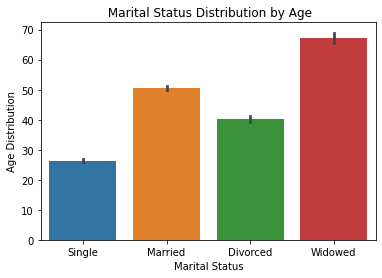

In [61]:
sns.barplot(x = 'Marital Status', y = 'Age', data = census_data)
plt.title(' Marital Status Distribution by Age')
plt.xlabel('Marital Status')
plt.ylabel('Age Distribution')
plt.show()

### Bar plot of Religion Distribution

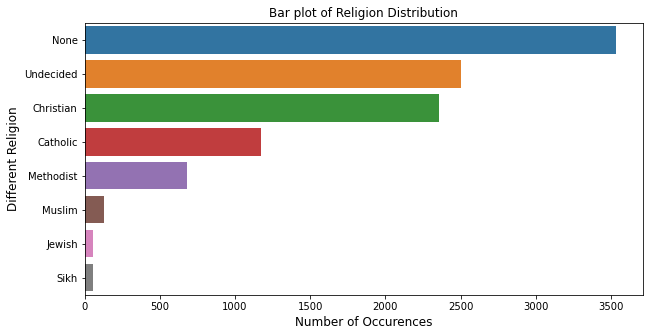

In [62]:
religion_count = census_data['Religion'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = religion_count.values, y = religion_count.index)
plt.title('Bar plot of Religion Distribution')
plt.xlabel('Number of Occurences', fontsize=12)
plt.ylabel('Different Religion', fontsize=12)
plt.show()

### Histogram of Age Distribution

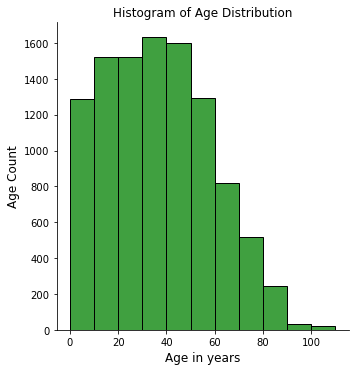

In [63]:
sns.displot(data = census_data, x = census_data['Age'], color = 'green', binwidth = 10)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Age Count', fontsize=12)
plt.show()

### Histogram of Age Distribution with kernel density estimation

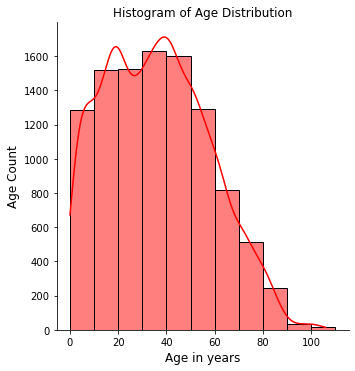

In [64]:
sns.displot(data = census_data, x = census_data['Age'], kde=True, binwidth = 10, color = 'red')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Age Count', fontsize=12)
plt.show()

### Histogram of Age Distribution with Gender

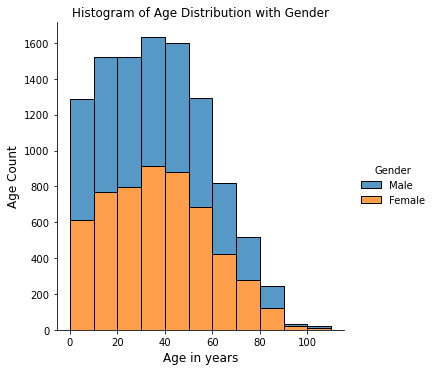

In [65]:
sns.displot(data = census_data, x = census_data['Age'], hue = 'Gender', binwidth = 10, multiple="stack")
plt.title('Histogram of Age Distribution with Gender')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Age Count', fontsize=12)
plt.show()

### Age Distribution Box Plot

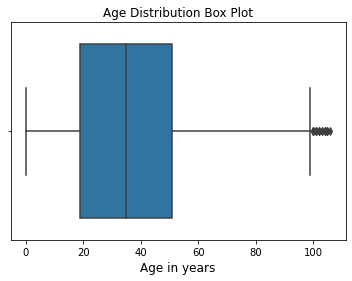

In [66]:
sns.boxplot(data = census_data, x = census_data['Age'])
plt.title('Age Distribution Box Plot')
plt.xlabel('Age in years', fontsize=12)
#plt.ylabel('Age Count', fontsize=12)
plt.show()

### Marital status value counts

In [67]:
census_data['Marital Status'].value_counts()

Single      6131
Married     2964
Divorced     964
Widowed      421
Name: Marital Status, dtype: int64

### Descriptive statistics of the marital status

In [68]:
census_data[census_data['Marital Status'] == 'Single'].describe()

,Age
count,6131.000000
mean,26.369923
std,18.180529
min,0.000000
25%,12.000000
50%,22.000000
75%,40.000000
max,105.000000


### Box plot of Marital Status Distribution with Age 

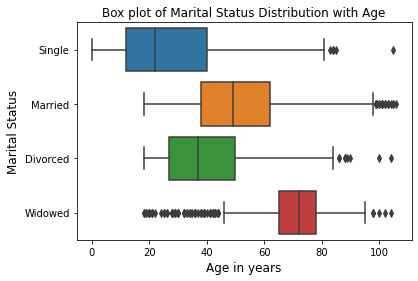

In [69]:
sns.boxplot(data = census_data, x = census_data['Age'], y = 'Marital Status')
plt.title('Box plot of Marital Status Distribution with Age')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.show()

### Male Age-band for age population pyramid

In [70]:
group_age = [age for age in range(0, census_data['Age'].max(), 5)]

male_group = pd.cut(census_data['Age'][census_data['Gender'] == 'Male'], group_age).value_counts(sort = False)* -1
male_group

(0, 5]       -331
(5, 10]      -361
(10, 15]     -340
(15, 20]     -429
(20, 25]     -372
(25, 30]     -328
(30, 35]     -367
(35, 40]     -388
(40, 45]     -369
(45, 50]     -342
(50, 55]     -312
(55, 60]     -263
(60, 65]     -225
(65, 70]     -152
(70, 75]     -132
(75, 80]      -96
(80, 85]      -70
(85, 90]      -28
(90, 95]       -7
(95, 100]      -8
(100, 105]     -8
Name: Age, dtype: int64

### Female Age-band for age population pyramid

In [71]:
female_group = pd.cut(census_data['Age'][census_data['Gender'] == 'Female'], group_age).value_counts(sort = False)
female_group

(0, 5]        315
(5, 10]       315
(10, 15]      345
(15, 20]      452
(20, 25]      376
(25, 30]      401
(30, 35]      451
(35, 40]      485
(40, 45]      466
(45, 50]      389
(50, 55]      364
(55, 60]      292
(60, 65]      250
(65, 70]      159
(70, 75]      152
(75, 80]      115
(80, 85]       76
(85, 90]       28
(90, 95]        7
(95, 100]      12
(100, 105]      6
Name: Age, dtype: int64

### Age Population Pyramid of the census

<Figure size 1440x1440 with 0 Axes>

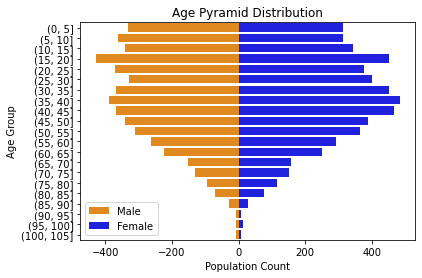

<Figure size 1440x1440 with 0 Axes>

In [72]:
age_pyramid = sns.barplot(data = male_group.reset_index(), x = 'Age', y = 'index', color= 'darkorange', label='Male', 
                          orient = 'horizontal', dodge=False)
age_pyramid = sns.barplot(data = female_group.reset_index(), x = 'Age', y = 'index', color = 'blue', label='Female', 
                          orient = 'horizontal', dodge=False)
age_pyramid.legend()
age_pyramid.set( xlabel= 'Population Count', ylabel = 'Age Group')
plt.title('Age Pyramid Distribution')
plt.figure(figsize = (20, 20))

### Total population

In [73]:
total_population = len(census_data)
total_population

10480

## Birth and Death Rates

### Crude Birth Rate (CBR)

In [74]:
### Babies at 0 year
babies0 = census_data['Age'] == 0
live_births0 = len(census_data[babies0])
#print(live_births0)

##3 Babies at 5 years
babies5 = census_data['Age'] == 5
live_births5 = len(census_data[babies5])
#print(live_births5)

## Babies at 10 years
babies10 = census_data['Age'] == 10
live_births10 = len(census_data[babies10])
#print(live_births10)

crude_br = (live_births0/total_population)* 1000
crude_br5yr = (live_births5/total_population)* 1000
crude_br10yr = (live_births10/total_population)* 1000

print('The present crude birth rate per 1000: ', crude_br)
print('The previous 5yr crude birth rate per 1000: ', crude_br5yr)
print('The previous 10yr crude birth rate per 1000: ', crude_br10yr)

The present crude birth rate per 1000:  9.064885496183205
The previous 5yr crude birth rate per 1000:  13.358778625954198
The previous 10yr crude birth rate per 1000:  12.595419847328245


### Crude Birth Change over years

In [75]:
print('Present CBR change from previous 5 years: ', (crude_br - crude_br5yr))
print('Present CBR change from previous 10 years: ', (crude_br - crude_br10yr))
print('CBR change between previous 5 & 10 years: ', (crude_br5yr - crude_br10yr))

Present CBR change from previous 5 years:  -4.293893129770993
Present CBR change from previous 10 years:  -3.5305343511450396
CBR change between previous 5 & 10 years:  0.7633587786259532


### Age Specific Fertility Rate

In [76]:
## Define women in child bearing age, corresponding to the year gaps postulated above

age_2529 = (census_data['Age'].between(25, 29)) & (census_data['Gender'] == 'Female')
age_3034 = (census_data['Age'].between(30, 34)) & (census_data['Gender'] == 'Female')
age_3540 = (census_data['Age'].between(35, 40)) & (census_data['Gender'] == 'Female')

## Calculate age-specific fertility rate

asfr_2529 = live_births0/len(census_data[age_2529])*1000
asfr_3034 = live_births5/len(census_data[age_3034])*1000
asfr_3540 = live_births10/len(census_data[age_3540])*1000

print('The age-specific fertility rate btw 25 - 29 per 1000: ', asfr_2529)
print('The age-specific fertility rate btw 30 - 34 per 1000: ', asfr_3034)
print('The age-specific fertility rate btw 35 - 40 per 1000: ', asfr_3540)

The age-specific fertility rate btw 25 - 29 per 1000:  239.29471032745593
The age-specific fertility rate btw 30 - 34 per 1000:  313.19910514541385
The age-specific fertility rate btw 35 - 40 per 1000:  234.04255319148936


### General fertility rate

In [77]:
total_live_births = live_births0 + live_births5 + live_births10

women_childbearing_age = len(census_data[age_2529]) + len(census_data[age_3034]) + len(census_data[age_3540])

gfr = (total_live_births/women_childbearing_age)*1000

print('The general fertility rate: ', gfr)

The general fertility rate:  260.6534090909091


### Crude Death Rate

In [78]:
aging_population = census_data[census_data['Age'].between(65, 106)].groupby('Age').size().sort_index(ascending=False)
aging_population

Age
106     1
105     3
104     3
103     2
102     3
101     3
100     4
99      6
98      4
97      2
96      4
95      2
94      4
93      2
92      5
91      1
90      3
89      9
88      9
87     14
86     21
85     14
84     27
83     32
82     25
81     48
80     43
79     38
78     31
77     50
76     49
75     38
74     61
73     49
72     67
71     69
70     63
69     58
68     58
67     65
66     67
65     70
dtype: int64

In [79]:
## Calculate the ages by shift (-1) 

ages_shift = aging_population.shift(-1)
ages_shift

Age
106     3.0
105     3.0
104     2.0
103     3.0
102     3.0
101     4.0
100     6.0
99      4.0
98      2.0
97      4.0
96      2.0
95      4.0
94      2.0
93      5.0
92      1.0
91      3.0
90      9.0
89      9.0
88     14.0
87     21.0
86     14.0
85     27.0
84     32.0
83     25.0
82     48.0
81     43.0
80     38.0
79     31.0
78     50.0
77     49.0
76     38.0
75     61.0
74     49.0
73     67.0
72     69.0
71     63.0
70     58.0
69     58.0
68     65.0
67     67.0
66     70.0
65      NaN
dtype: float64

In [80]:
ages_difference = aging_population - ages_shift
ages_difference = ages_difference.reset_index(name= 'Count')
deaths = ages_difference[ages_difference['Count'] < 0]
deaths

,Age,Count
0,106,-2.0
3,103,-1.0
5,101,-1.0
6,100,-2.0
9,97,-2.0
11,95,-2.0
13,93,-3.0
15,91,-2.0
16,90,-6.0
18,88,-5.0


In [81]:
death_rate = abs(((deaths['Count']).sum())/ total_population)*1000
death_rate

14.122137404580153

## Crude Growth Rate

### CGR = birth_rate - death_rate

In [82]:
growth_rate = crude_br - death_rate

print('The growth rate: ', growth_rate)
print('The growth rate in percentage: ', (growth_rate/10))

The growth rate:  -5.057251908396948
The growth rate in percentage:  -0.5057251908396948


## Possible migrants


### University and PhD Students areconstant factor in the population growth 
### likely immigrants are Lodger and Visitor
### Emigrants: Difference in female and male divorcees

In [83]:
census_data[census_data['Occupation'] == 'Tourist']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [84]:
## University should considered a constant factor in the population growth.
#university_students = census_data[census_data['Occupation'] == 'University Student']
#phd_students = census_data[census_data['Occupation'] == 'PhD Student']

total_population = len(census_data)

## Imigration
lodgers = census_data[(census_data['Relationship to Head of House'] == 'Lodger') & (census_data['Marital Status'] == 'Single')]      
visitors = census_data[(census_data['Relationship to Head of House'] == 'Visitor') & (census_data['Marital Status'] == 'Single')]
coming_in = lodgers.append(visitors)
imigration = len(coming_in)
imigration_per_1000 = (imigration/total_population)* 1000
print('Imigration per 1000: ', imigration_per_1000)

## Emigration
male_divorce = census_data[(census_data['Gender'] == 'Male') & (census_data['Marital Status'] == 'Divorced')] 
female_divorce = census_data[(census_data['Gender'] == 'Female') & (census_data['Marital Status'] == 'Divorced')]
emigration = len(female_divorce) - len(male_divorce)
emigration_per_1000 = (emigration/total_population)* 1000
print('Emigration per 1000: ', emigration_per_1000)

## Net Migration
net_migration =  imigration - emigration
print('The net migration: ', net_migration)

net_migration_rate = (net_migration/total_population)*1000
print('The net migration rate: ', net_migration_rate)

Imigration per 1000:  28.62595419847328
Emigration per 1000:  18.320610687022903
The net migration:  108
The net migration rate:  10.305343511450381


### Population Change

In [85]:
population_change = (growth_rate + net_migration_rate)/10
print('The population change is: ', population_change)

The population change is:  0.5248091603053433


## Communters: 
##### Commuters are people who travel some distance to work or other purpose on a regular basis
##### These include individual with Occupation like University Students, PhD Students and hosts of other professions that are likely to be commuting to work e.g Air Cabin Crew, Assocaite Professors etc

In [86]:
occupations_list = (census_data['Occupation'].unique())

commuters_number = []
non_commuters_number = []
import re
for item in list(occupations_list):
    if (bool(re.match(r'.*retired.*', item.lower()))):
        non_commuters_number.append(item)
    elif item.lower() in ['student', 'child', 'unemployed']:
        non_commuters_number.append(item)
    elif (bool(re.match(r'.*(teacher|community).*', item.lower()))):
        non_commuters_number.append(item)
    else:
        commuters_number.append(item)
        
number_professions = len(occupations_list)
print('Total number of occupation: ', number_professions)

commuters = len(commuters_number)
print('Presumed number of jobs required commuting: ', commuters )

Total number of occupation:  1136
Presumed number of jobs required commuting:  621


In [87]:
percentage_job_commuters = (commuters/number_professions)*100
print('Percentage of occupation required commuting: ', percentage_job_commuters)

Percentage of occupation required commuting:  54.66549295774647


## OCCUPANCY LEVEL OF THE TOWN
### Occupancy rate is calculated by dividing the total number of rooms occupied in that period by the total number of available rooms in that period.
### Let's assume, on the average each housing unit consists of 3 bedrooms
### Number of available rooms = 3749 * 3
### Number of rooms occupied = len(census_data); assumimg one person is staying in one room.

In [88]:
occupancy = census_data.groupby(['House Number', 'Street']).size().reset_index(name = 'Occupant')
occupancy 

,House Number,Street,Occupant
0,1,Alba Keys,2
1,1,Arch Avenue,3
2,1,Ash Estates,1
3,1,Autumn Shoal,3
4,1,Bailey Islands,5
...,...,...,...
3744,99,Coventry Causeway,4
3745,99,Horton Drive,2
3746,99,Kelly Pass,1
3747,99,Newfound Corner,2


In [89]:
occupancy[occupancy.Occupant > 3]

,House Number,Street,Occupant
4,1,Bailey Islands,5
5,1,Bangor Lane,4
7,1,Bath Branch,4
9,1,Blackclub Road,4
10,1,Brown Avenue,5
...,...,...,...
3738,98,Horton Drive,4
3742,99,Bailey Islands,4
3743,99,Causeway Avenue,6
3744,99,Coventry Causeway,4


In [90]:
## Descriptive statistics of the occupants
occupancy.describe()

,Occupant
count,3749.000000
mean,2.795412
std,1.716428
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,22.000000


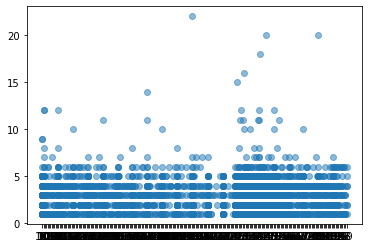

In [91]:
## Scatter plot of the occupants with house number
plt.scatter(occupancy['House Number'], occupancy.Occupant, alpha=0.5)
plt.show()

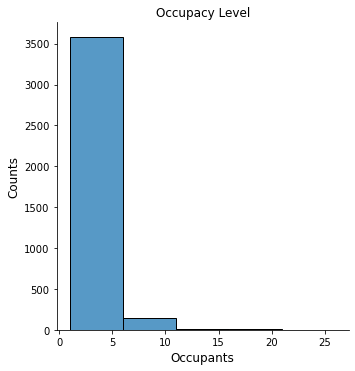

In [92]:
### Occupancy distribution per counts
sns.displot(data = occupancy, x = occupancy.Occupant, binwidth = 5, multiple="stack")
plt.title('Occupacy Level')
plt.xlabel('Occupants', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [93]:
housing_units = occupancy.Occupant.count()
# Number of housing units = len(occupancy) or occupancy.Occupant.count()
#print('The number of housing units:', housing_units)

total_available_rooms = 3 * housing_units
# Total rooms available assuming we have 3 rooms per house
#print('Total number of available rooms would be: ', total_available_rooms)

total_rooms_occupied = occupancy.Occupant.sum()
# Total rooms occupied
#print('Total number of rooms occupied:', total_rooms_occupied)

occupancy_rate = total_rooms_occupied/total_available_rooms
print('The average occupancy rate per room is: ', occupancy_rate)
print('The occupancy level per house is: ', occupancy_rate*3)

The average occupancy rate per room is:  0.9318040366319907
The occupancy level per house is:  2.795412109895972


## Unemployment trends.
### Unemployment rate = (Unemployed ÷ Labor Force) x 100
### Employed: currently working for pay
### Unemployed: Out of work and actively looking for a job
### Out of the labor force: Out of paid workforce and/or not actively looking for a job(retirement, rearing children, taking a voluntary break before a new job)
### Labor force: the number of employed plus the unemployed

In [94]:
## Unemployed population
not_employed = census_data[census_data['Occupation'] == 'Not-employed']

unemployed = census_data[census_data['Occupation'] == 'Unemployed']

total_unemployment = unemployed.append(not_employed)
total_unemployment

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,8,Orry Row,Conor,Frost,38,Head,Married,Male,Unemployed,None,None
49,28,Orry Row,Gerald,Bennett,32,Head,Divorced,Male,Unemployed,None,Catholic
60,37,Orry Row,Zoe,Tucker,52,Head,Single,Female,Unemployed,None,Muslim
63,39,Orry Row,Ruth,Shaw,43,Head,Single,Female,Unemployed,None,None
67,41,Orry Row,Zoe,Houghton,44,Head,Divorced,Female,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
10406,52,Williams Road,Marc,Bennett,29,Head,Single,Male,Unemployed,None,None
10410,55,Williams Road,Sylvia,Smith,54,Head,Divorced,Female,Unemployed,None,Christian
10471,1,Marsh Commune,Keith,Smith,53,Lodger,Single,Male,Unemployed,None,None
10475,1,Lewis Abbey,Annette,Kemp,41,Head,Widowed,Female,Unemployed,None,None


In [95]:
## Descriptive statistics of unemployed
total_unemployment.describe()

,Age
count,625.000000
mean,42.526400
std,11.047088
min,20.000000
25%,33.000000
50%,42.000000
75%,51.000000
max,64.000000


### Histogram of Total_unemployment Distribution by Age and Gender

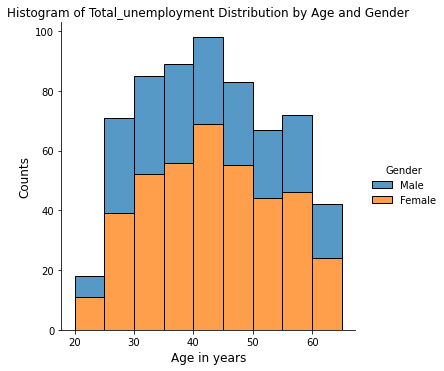

In [96]:
sns.displot(data = census_data, x = total_unemployment.Age, hue = 'Gender', binwidth = 5, multiple="stack")
plt.title('Histogram of Total_unemployment Distribution by Age and Gender')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [97]:
unemployed_women = total_unemployment[total_unemployment['Gender'] == 'Female']
unemployed_women

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
60,37,Orry Row,Zoe,Tucker,52,Head,Single,Female,Unemployed,None,Muslim
63,39,Orry Row,Ruth,Shaw,43,Head,Single,Female,Unemployed,None,None
67,41,Orry Row,Zoe,Houghton,44,Head,Divorced,Female,Unemployed,None,None
85,50,Orry Row,Kerry,Little,34,Head,Single,Female,Unemployed,None,Catholic
158,18,Ford Throughway,Annette,Power,46,Head,Married,Female,Unemployed,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
10332,4,Williams Road,Shirley,Carey,63,Head,Divorced,Female,Unemployed,None,Methodist
10373,31,Williams Road,Kayleigh,Pritchard-Todd,48,Head,Divorced,Female,Unemployed,None,None
10410,55,Williams Road,Sylvia,Smith,54,Head,Divorced,Female,Unemployed,None,Christian
10475,1,Lewis Abbey,Annette,Kemp,41,Head,Widowed,Female,Unemployed,None,None


### Women Unemployment in the town

In [98]:
## women unemployment
total_unemployed = len(total_unemployment)
print(total_unemployed)
women_unemployment = len(unemployed_women)
print(women_unemployment)

percentage_women_unemployment = (women_unemployment/total_unemployed)* 100
print('The percentage of women unemployment: ', percentage_women_unemployment)

625
396
The percentage of women unemployment:  63.36000000000001


### Population labour force

##### Out of labour force: students and women looking after children
##### Actual labour force
##### Unemployment rate

In [99]:
#labour_population
labour_population = census_data[(census_data['Age'] < 65) & (census_data['Age']>= 18)]
labour_force = len(labour_population)
print('Presumed labour force: ', labour_force)

## Out of labour force: All categeories of student are out of labour force and women rearing children
## Student within labour population
student_labour = labour_population[labour_population.Occupation == 'Student']
num_student_labour = len(student_labour)
print('Students: ', num_student_labour)

## University Student within labour population
university_student_labour = labour_population[labour_population.Occupation == 'University Student']
num_university_student_labour = len(university_student_labour)
print('University Students: ', num_university_student_labour)

## PhD Student within labour population
phd_student_labour = labour_population[labour_population.Occupation == 'PhD Student']
num_phd_student_labour = len(phd_student_labour)
print('PhD Students: ', num_phd_student_labour)

## Women presumed to be rearing children
rearing_childr = (census_data['Age'].between(25, 40)) & (census_data['Gender'] == 'Female') & (census_data['Occupation'] == 'Unemployed')
women_rearing_childr = len(census_data[rearing_childr])
print('Women presumed to be looking after children: ', women_rearing_childr)
                           
## Out of labour force
out_of_labour_force = num_phd_student_labour + num_university_student_labour + num_student_labour + women_rearing_childr
print('Out of labour force: ', out_of_labour_force)

## Actual labour force
actual_labour_force = len(labour_population) - out_of_labour_force
print('Actual labour force: ', actual_labour_force)

## Total unemployed
total_unemployed = len(total_unemployment)
print('Total number of unemployed: ', total_unemployed)

## Unemployment rate
unemployment_rate = (total_unemployed/actual_labour_force)*100
print('The unemployment rate is: ', unemployment_rate)

Presumed labour force:  6927
Students:  151
University Students:  689
PhD Students:  19
Women presumed to be looking after children:  158
Out of labour force:  1017
Actual labour force:  5910
Total number of unemployed:  625
The unemployment rate is:  10.575296108291033


### Number of University Students (PhD students inclusive)

In [100]:
university_student  = census_data[census_data['Occupation'] == 'University Student']
phd_student = census_data[census_data['Occupation'] == 'PhD Student']

total_university_student = university_student.append(phd_student)
total_university_student

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
18,9,Orry Row,Leah,Peters,19,Step-Daughter,Single,Female,University Student,None,Methodist
34,17,Orry Row,Harry,Brown,20,Head,Divorced,Male,University Student,None,None
52,30,Orry Row,Gail,Hill,22,Head,Single,Female,University Student,None,None
59,36,Orry Row,Amber,Bird,21,Daughter,Divorced,Female,University Student,None,None
98,2,Ford Throughway,Maria,Nicholson,20,None,Single,Female,University Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8643,23,Causeway Avenue,Howard,Price,24,Son,Single,Male,PhD Student,None,Christian
9092,142,Causeway Avenue,Gary,Jones,25,Head,Single,Male,PhD Student,None,None
9093,142,Causeway Avenue,Mathew,O'Sullivan,30,None,Single,Male,PhD Student,None,Christian
9615,90,Coventry Causeway,Emma,Ali,32,None,Single,Female,PhD Student,None,Christian


In [101]:
total_university_students = len(total_university_student)
print('The total University Students: ', total_university_students)

The total University Students:  708


In [102]:
## Descriptive statistics of the university students
total_university_student.describe()

,Age
count,708.000000
mean,20.502825
std,1.700734
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,32.000000


In [103]:
### University students counts
total_university_student.Occupation.value_counts()

University Student    689
PhD Student            19
Name: Occupation, dtype: int64

### Bar plot of University Students Distribution by Age

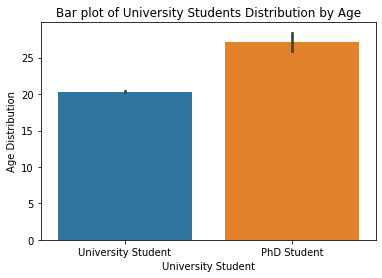

In [104]:
sns.barplot(x = total_university_student.Occupation, y = total_university_student.Age, data = total_university_student)
plt.title('Bar plot of University Students Distribution by Age')
plt.xlabel('University Student')
plt.ylabel('Age Distribution')
plt.show()

### Bar plot of University Students Distribution by Gender

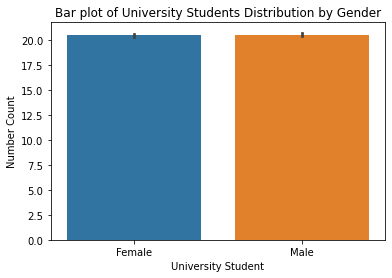

In [105]:
sns.barplot(x = total_university_student.Gender, y = total_university_student.Age, data = total_university_student)
plt.title('Bar plot of University Students Distribution by Gender')
plt.xlabel('University Student')
plt.ylabel('Number Count')
plt.show()

 ## Divorce and Marriage rates. 

In [106]:
## Number of divorcess
divorced = census_data[(census_data['Marital Status'] == 'Divorced') & (census_data['Gender'] == 'Female')]
number_of_divorces = len(divorced)
print(number_of_divorces)

## Number of marriages
married = census_data[census_data['Marital Status'] == 'Married']
number_of_marriages = len(married)/2
print(number_of_marriages)

total_population = len(census_data)

divorce_rate = number_of_divorces/ total_population
print('Divorce rate per 1000: ', divorce_rate*1000)

marriage_rate = (number_of_marriages /total_population)
print('Marriage rate per 1000: ', marriage_rate*1000)

578
1482.0
Divorce rate per 1000:  55.152671755725194
Marriage rate per 1000:  141.41221374045801


## Religion affliations

#### Percentage of people that unaffliated with any religion [None + Undecided]

In [107]:
no_affliatiion = census_data[census_data['Religion'] == 'None']
none_religion = len(no_affliatiion)
print('People with no religion affliation: ', none_religion)

undecided = census_data[census_data['Religion'] == 'Undecided']
undecided = len(undecided)
print('Number of people that are undecided: ', undecided)

christian = census_data[census_data['Religion'] == 'Christian']
christian = len(christian)
print('Christian Population: ', christian)

catholic = census_data[census_data['Religion'] == 'Catholic']
catholic = len(catholic)
print('Catholic Population: ', catholic)

methodist = census_data[census_data['Religion'] == 'Methodist']
methodist = len(methodist)
print('Methodist Population: ', methodist)

muslim = census_data[census_data['Religion'] == 'Muslim']
muslim = len(muslim)
print('Muslim Population: ', muslim)

jewish = census_data[census_data['Religion'] == 'Jewish']
jewish = len(jewish)
print('Jewish Population: ', jewish)

sikh = census_data[census_data['Religion'] == 'Sikh']
sikh = len(sikh)
print('Sikh Population: ', sikh)

total_population = len(census_data)

## Percentage of people that are unaffliated with any religion
unaffliated = (none_religion + undecided)
print('Population of unaffliated with religion: ', unaffliated)

percentage_unaffliated = unaffliated/total_population
print('The percentage of unaffliated population: ', percentage_unaffliated*100)

People with no religion affliation:  3534
Number of people that are undecided:  2502
Christian Population:  2356
Catholic Population:  1173
Methodist Population:  679
Muslim Population:  129
Jewish Population:  54
Sikh Population:  53
Population of unaffliated with religion:  6036
The percentage of unaffliated population:  57.595419847328245


### Box plot of Religion Distribution by Age

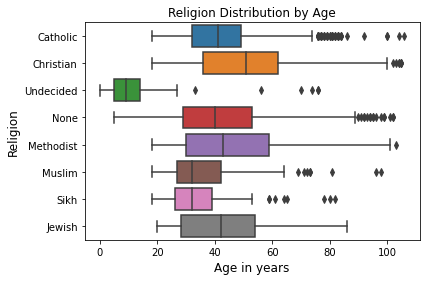

In [108]:
sns.boxplot(data = census_data, x = census_data['Age'], y = 'Religion')
plt.title('Religion Distribution by Age')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Religion', fontsize=12)
plt.show()

### Histogram of Religion Distribution by Age and Gender

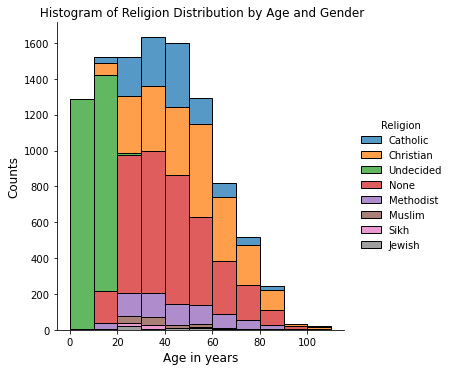

In [109]:
sns.displot(data = census_data, x = census_data.Age, hue = 'Religion', binwidth = 10, multiple="stack")
plt.title(' Histogram of Religion Distribution by Age and Gender')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()